In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


Mounted at /content/drive


In [2]:
# Load the Dataset
df = pd.read_excel('/content/drive/MyDrive/Bird Strikes data.xlsx')


In [3]:
df.shape

(25558, 26)

In [4]:
# First five rows of the dataset using head() function
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

**Data Cleaning**

In [6]:
# Check for null values

null_values = df.isnull().sum()
print(null_values)

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [7]:
# Convert 'FlightDate' to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%d-%m-%Y %H:%M')

# Fill missing values or drop rows/columns with missing values
df = df.dropna()  # Example: dropping rows with any missing values


In [8]:
df.shape

(180, 26)

In [9]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [10]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Cost: Total $,Feet above ground,Number of people injured
count,180.000000,180.000000,180,1.800000e+02,180.000000,180.0
mean,245206.261111,7.994444,2006-03-25 23:28:00,6.212729e+04,324.533333,0.0
min,200097.000000,1.000000,2000-03-08 00:00:00,0.000000e+00,0.000000,0.0
25%,223207.000000,1.000000,2003-10-06 12:00:00,0.000000e+00,0.000000,0.0
50%,237834.500000,1.000000,2006-03-01 12:00:00,0.000000e+00,0.000000,0.0
75%,260434.000000,6.250000,2009-01-07 06:00:00,0.000000e+00,200.000000,0.0
max,319260.000000,97.000000,2011-11-16 00:00:00,3.006592e+06,8000.000000,0.0
std,31016.926623,18.178352,NaN,3.539734e+05,942.856971,0.0


**Exploratory Data Analysis**

Visuals Depicting the Number of Bird Strikes

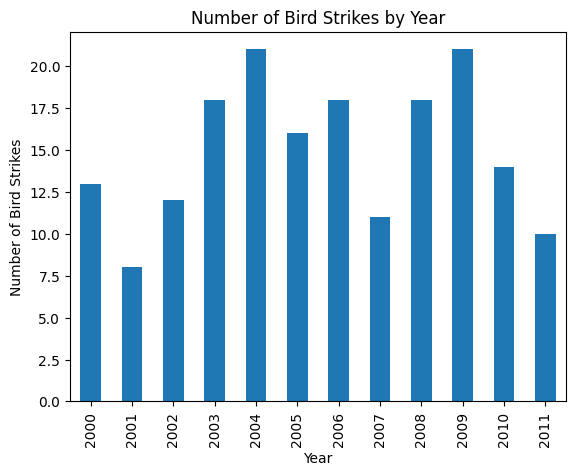

In [11]:
# Bar Chart: Number of bird strikes by year
df['Year'] = df['FlightDate'].dt.year
yearly_strikes = df['Year'].value_counts().sort_index()
yearly_strikes.plot(kind='bar', title='Number of Bird Strikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()


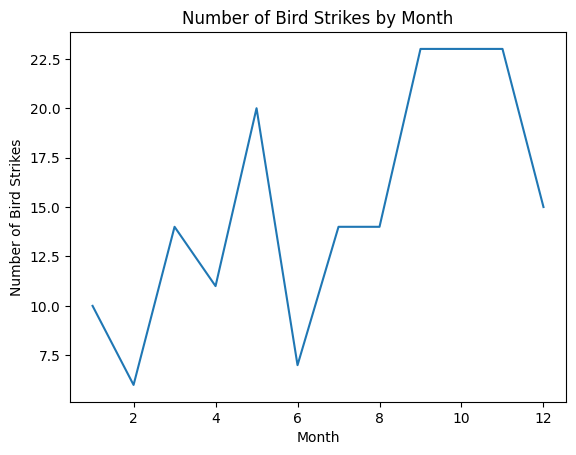

In [12]:
# Line Graph: Number of bird strikes by month
df['Month'] = df['FlightDate'].dt.month
monthly_strikes = df['Month'].value_counts().sort_index()
monthly_strikes.plot(kind='line', title='Number of Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.show()


Yearly Analysis & Bird Strikes in the US

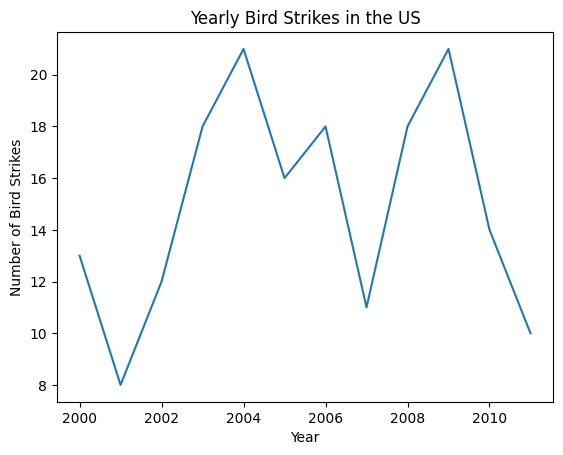

In [13]:
# Extract year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# Line Graph: Yearly trend of bird strikes
yearly_strikes.plot(kind='line', title='Yearly Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()


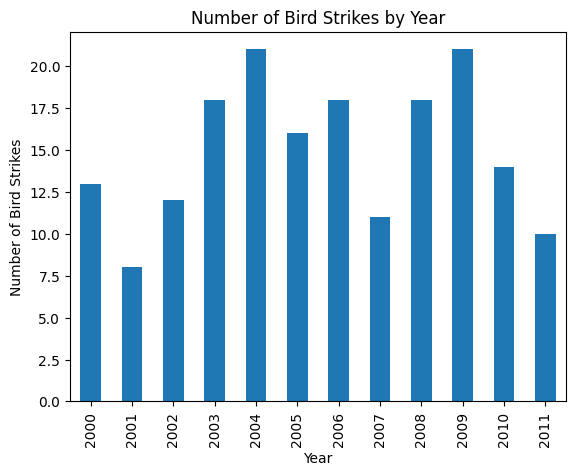

In [14]:
# Bar Chart: Number of bird strikes by year
yearly_strikes.plot(kind='bar', title='Number of Bird Strikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()


Top 10 US Airlines in terms of having encountered bird strikes

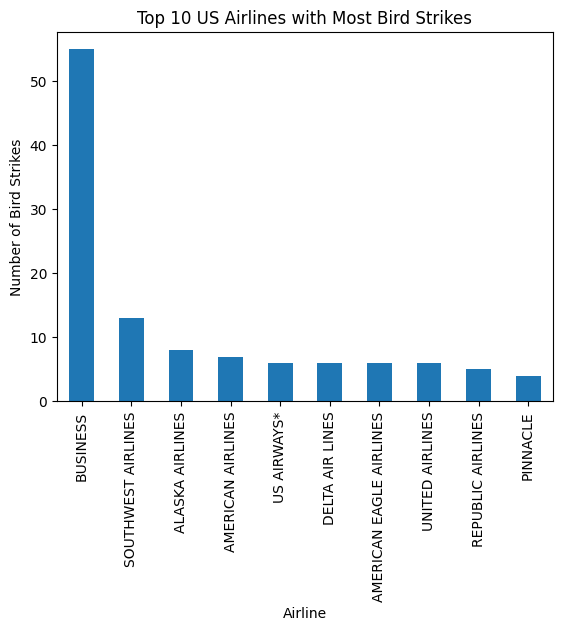

In [15]:
# Bar Chart: Top 10 airlines with most bird strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)
top_airlines.plot(kind='bar', title='Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.show()



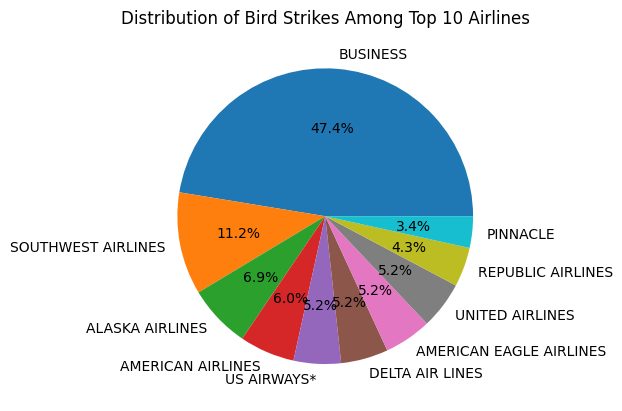

In [16]:
# Pie Chart: Distribution of bird strikes among top 10 airlines
top_airlines.plot(kind='pie', title='Distribution of Bird Strikes Among Top 10 Airlines', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


Airports with Most Incidents of Bird Strikes – Top 50

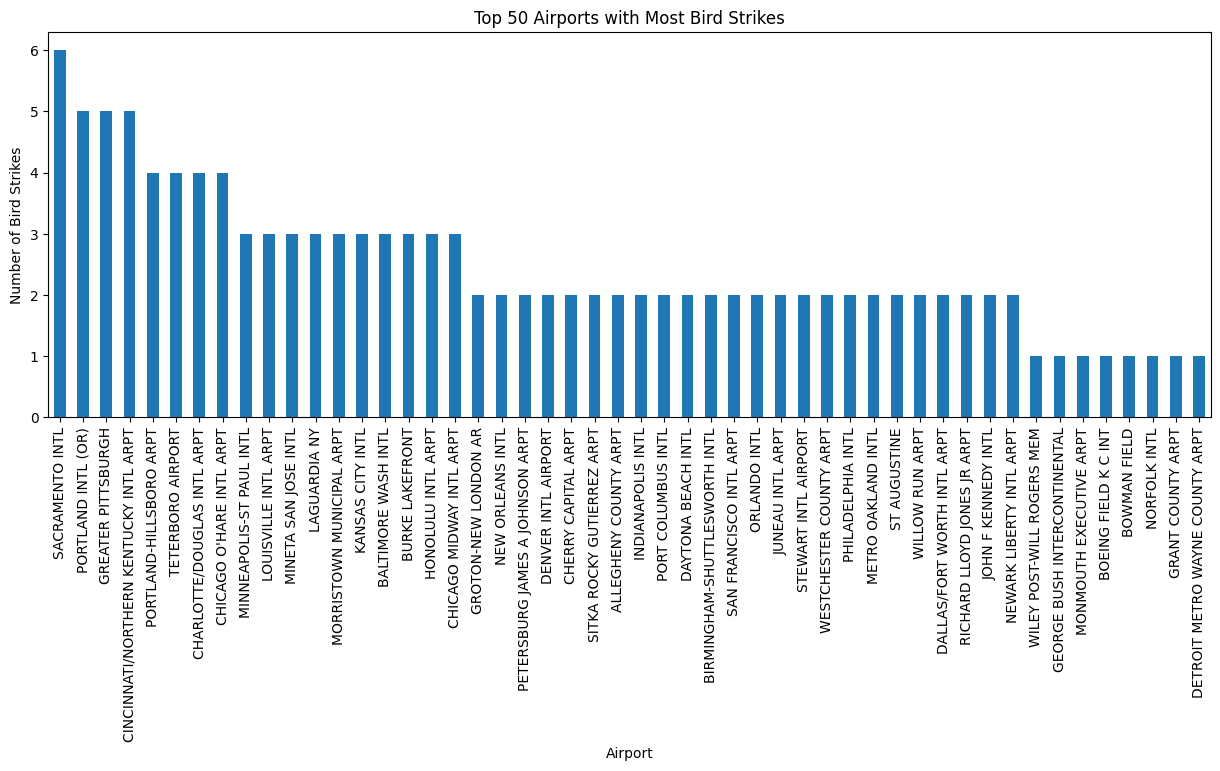

In [17]:
# Bar Chart: Top 50 airports with most bird strikes
top_airports = df['Airport: Name'].value_counts().head(50)
top_airports.plot(kind='bar', figsize=(15, 5), title='Top 50 Airports with Most Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.show()

# Heatmap: Airports with most bird strikes (requires geographical data)
import folium
from folium.plugins import HeatMap

# Example: Creating a heatmap (assuming you have latitude and longitude data for airports)
# airport_coords = {'LAGUARDIA NY': [40.7769, -73.8740], 'DALLAS/FORT WORTH INTL ARPT': [32.8998, -97.0403], ...}
# df['Coordinates'] = df['Airport: Name'].map(airport_coords)
# heat_data = [[row['Coordinates'][0], row['Coordinates'][1]] for index, row in df.iterrows() if row['Coordinates']]
# HeatMap(heat_data).add_to(folium.Map(location=[39.8283, -98.5795], zoom_start=4))


Yearly Cost Incurred due to Bird Strikes

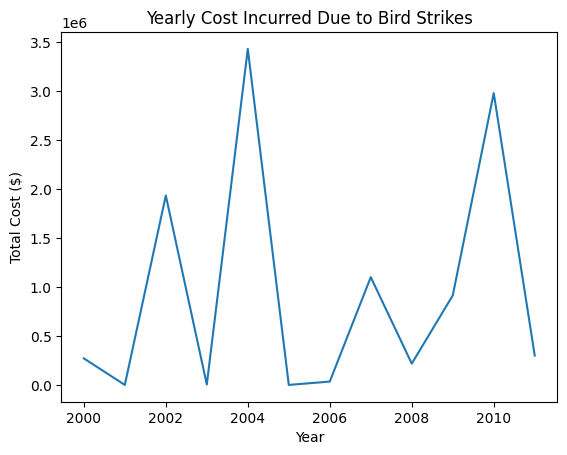

In [18]:
# Line Graph: Yearly cost incurred due to bird strikes
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()
yearly_cost.plot(kind='line', title='Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()



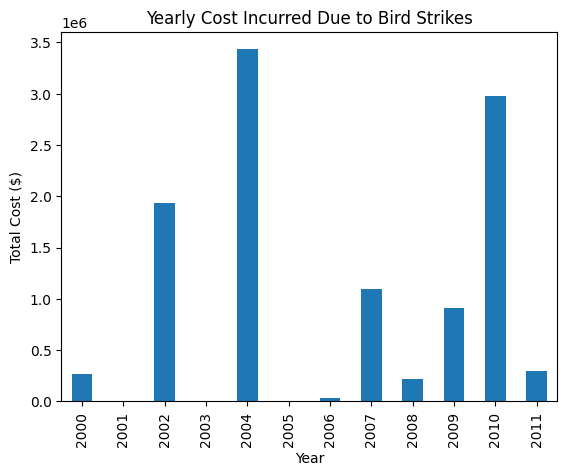

In [19]:
# Bar Chart: Yearly cost incurred due to bird strikes
yearly_cost.plot(kind='bar', title='Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()


When Do Most Bird Strikes Occur?

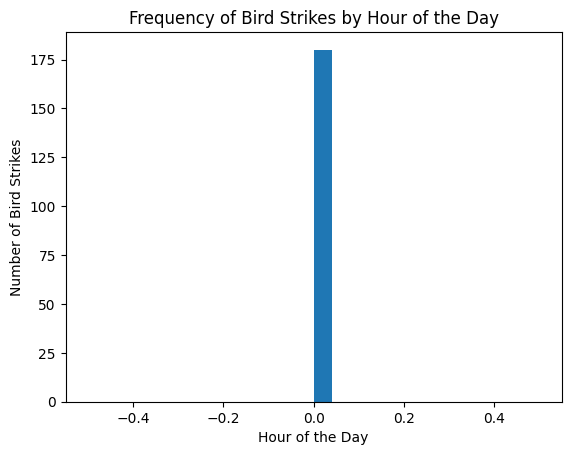

In [20]:
# Histogram: Frequency of bird strikes by time of day
df['Hour'] = df['FlightDate'].dt.hour
df['Hour'].plot(kind='hist', bins=24, title='Frequency of Bird Strikes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bird Strikes')
plt.show()



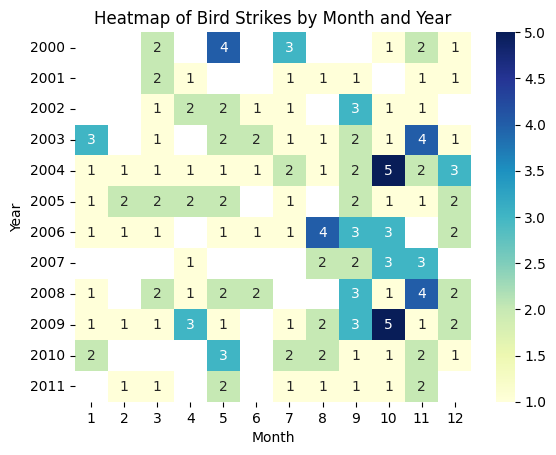

In [21]:
# Heatmap: Distribution of bird strikes over different periods (requires additional data processing)
# Example: Creating a heatmap for bird strikes by month and year
heatmap_data = df.pivot_table(index='Year', columns='Month', values='Record ID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Bird Strikes by Month and Year')
plt.show()


Altitude of Aeroplanes at the Time of Strike

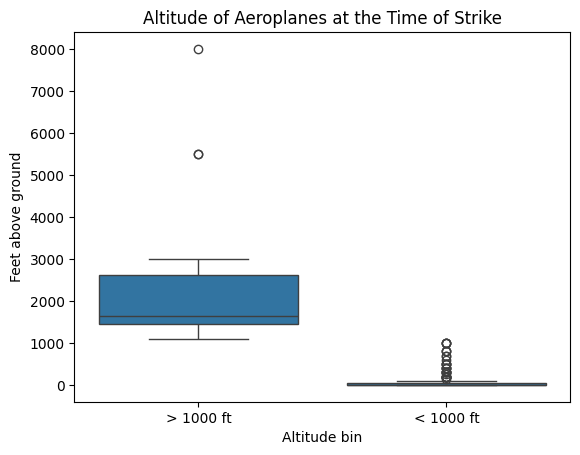

In [22]:
# Box Plot: Altitude of aeroplanes at the time of strike
sns.boxplot(data=df, x='Altitude bin', y='Feet above ground')
plt.title('Altitude of Aeroplanes at the Time of Strike')
plt.show()



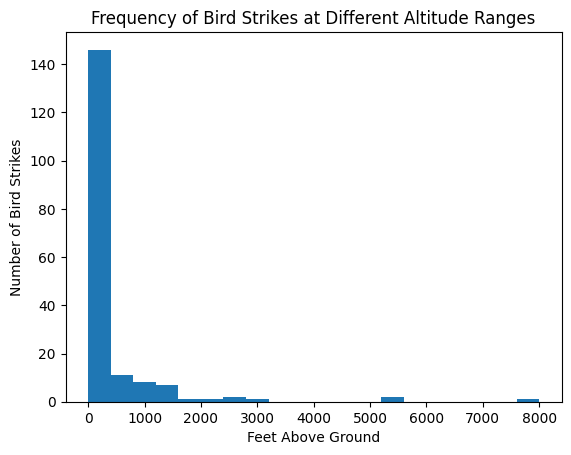

In [23]:
# Histogram: Frequency of bird strikes at different altitude ranges
df['Feet above ground'].plot(kind='hist', bins=20, title='Frequency of Bird Strikes at Different Altitude Ranges')
plt.xlabel('Feet Above Ground')
plt.ylabel('Number of Bird Strikes')
plt.show()


Phase of Flight at the Time of the Strike

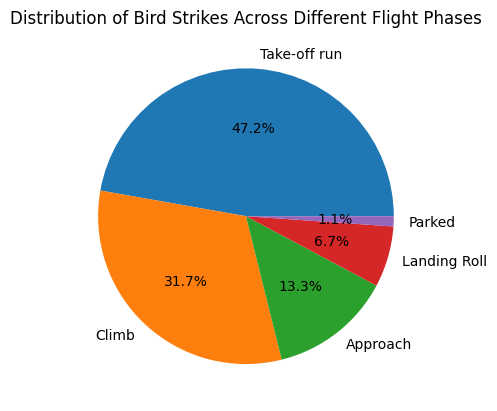

In [24]:
# Pie Chart: Distribution of bird strikes across different flight phases
df['When: Phase of flight'].value_counts().plot(kind='pie', title='Distribution of Bird Strikes Across Different Flight Phases', autopct='%1.1f%%')
plt.ylabel('')
plt.show()



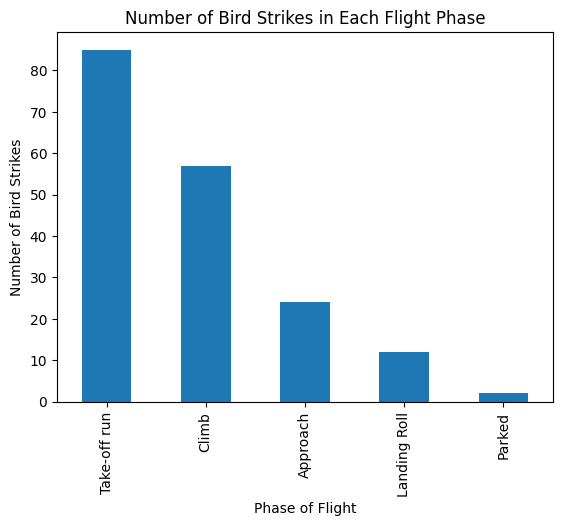

In [25]:
# Bar Chart: Number of bird strikes in each flight phase
df['When: Phase of flight'].value_counts().plot(kind='bar', title='Number of Bird Strikes in Each Flight Phase')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()


Average Altitude of the Aeroplanes in Different Phases at the Time of Strike

<ipython-input-26-f34c761c2a4c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='When: Phase of flight', y='Feet above ground', ci='sd')


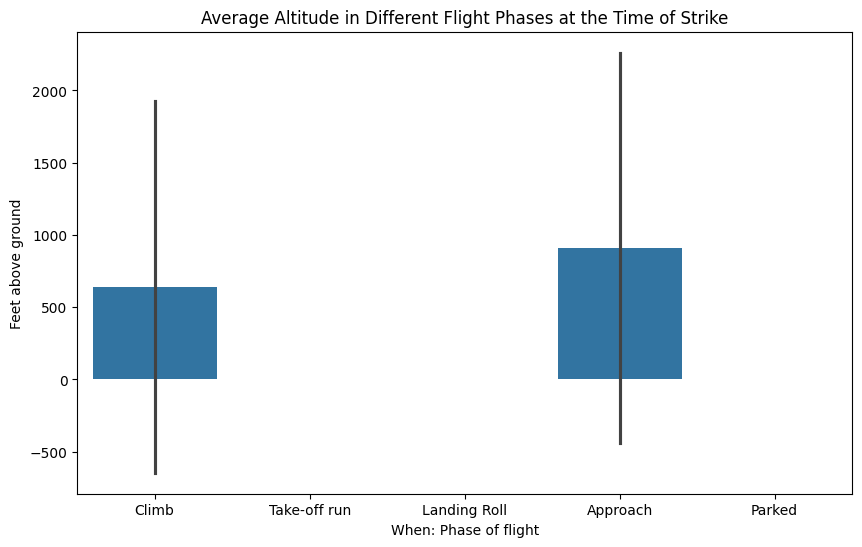

In [26]:
# Bar Plot: Average altitude in different flight phases
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='When: Phase of flight', y='Feet above ground', ci='sd')
plt.title('Average Altitude in Different Flight Phases at the Time of Strike')
plt.show()


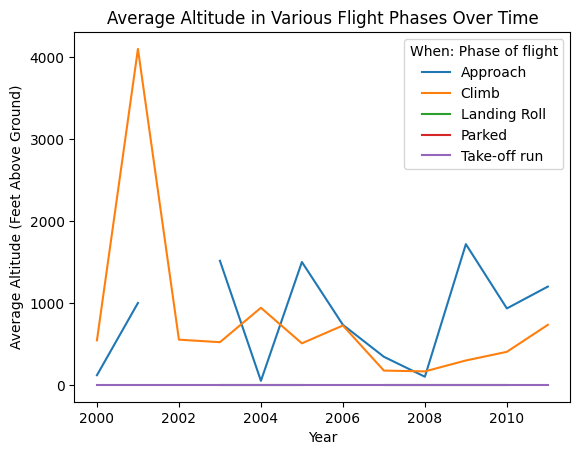

In [27]:
# Line Graph: Trend of average altitude in various flight phases over time
average_altitude = df.groupby(['Year', 'When: Phase of flight'])['Feet above ground'].mean().unstack()
average_altitude.plot(kind='line', title='Average Altitude in Various Flight Phases Over Time')
plt.xlabel('Year')
plt.ylabel('Average Altitude (Feet Above Ground)')
plt.show()


Effect of Bird Strikes & Impact on Flight

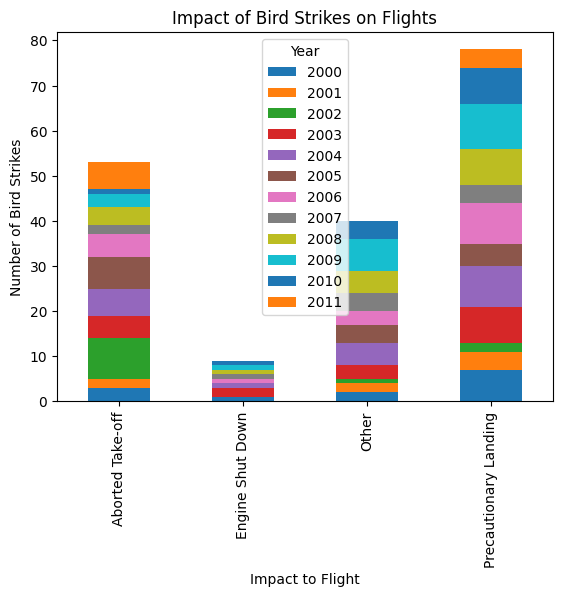

In [28]:
# Stacked Bar Chart: Impact of bird strikes
impact_counts = df.groupby(['Effect: Impact to flight', 'Year']).size().unstack().fillna(0)
impact_counts.plot(kind='bar', stacked=True, title='Impact of Bird Strikes on Flights')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()



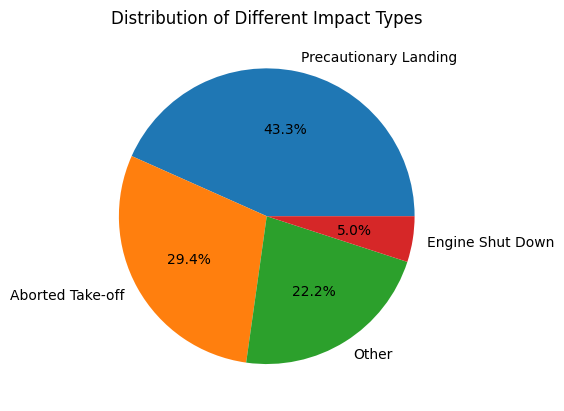

In [29]:
# Pie Chart: Distribution of different impact types
df['Effect: Impact to flight'].value_counts().plot(kind='pie', title='Distribution of Different Impact Types', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


Effect of Strike at Different Altitude

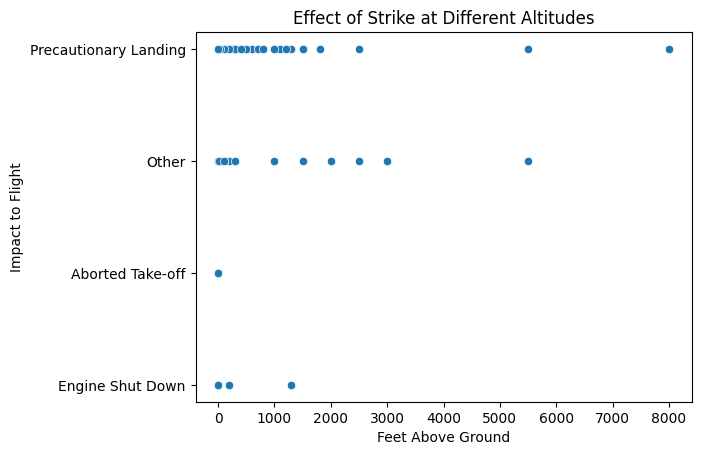

In [30]:
# Scatter Plot: Altitude of strike vs. severity of impact
sns.scatterplot(data=df, x='Feet above ground', y='Effect: Impact to flight')
plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Feet Above Ground')
plt.ylabel('Impact to Flight')
plt.show()


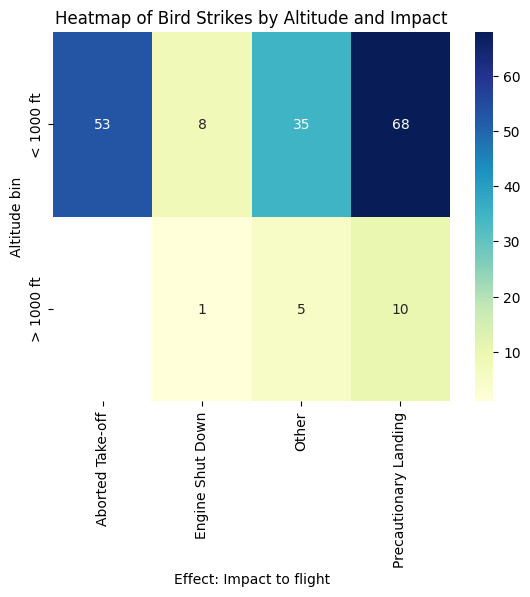

In [31]:
# Heatmap: Distribution and severity of bird strikes at different altitude ranges
heatmap_data = df.pivot_table(index='Altitude bin', columns='Effect: Impact to flight', values='Record ID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Bird Strikes by Altitude and Impact')
plt.show()


Were Pilots Informed? & Prior Warning and Effect of Strike Relation

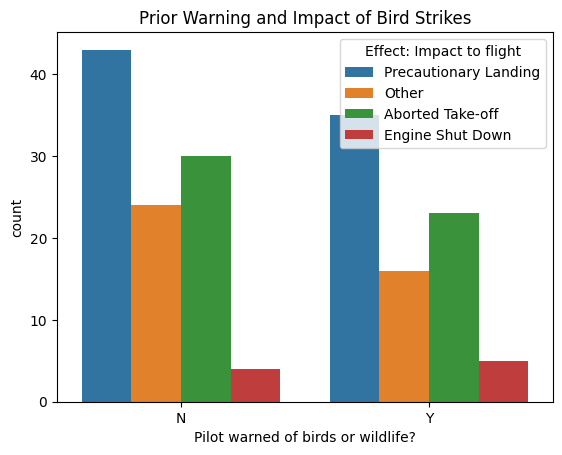

In [32]:
# Plot the relation between prior warning and impact of strike
sns.countplot(data=df, x='Pilot warned of birds or wildlife?', hue='Effect: Impact to flight')
plt.title('Prior Warning and Impact of Bird Strikes')
plt.show()
